In [33]:
import pandas as pd
import numpy as np
import shap

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
# ide 에서 바로 확인하기 위해서
shap.initjs()

In [35]:
sales = pd.read_csv('data/Advertising Budget and Sales.csv',index_col = 0)
sales.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
X = sales.drop(columns='Sales ($)')
y = sales['Sales ($)']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

In [38]:
rfr = RandomForestRegressor(random_state=12345,n_estimators=20,max_depth=5)

In [39]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12345)

In [40]:
explainer = shap.TreeExplainer(rfr)

In [41]:
shap_train = explainer.shap_values(X_train)

In [42]:
shap_test = explainer.shap_values(X_test)

In [43]:
shap_train_df = pd.DataFrame(shap_train,columns=['TV','Radio','NewPaper'],index=X_train.index)
shap_test_df = pd.DataFrame(shap_test,columns=['TV','Radio','NewPaper'],index=X_test.index)

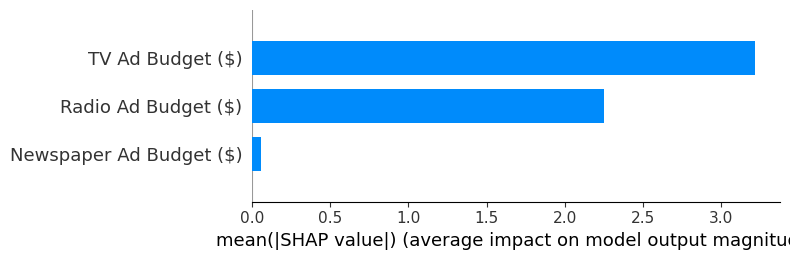

<Axes: ylabel='None'>

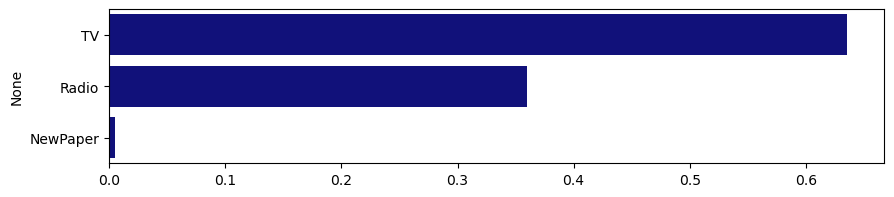

In [75]:
shap.summary_plot(
    shap_train,
    X_train,
    plot_type='bar'
)
plt.figure(figsize=(10,2))
sns.barplot(
    x=rfr.feature_importances_,
    y=shap_test_df.columns,
    color='DarkBlue'
)

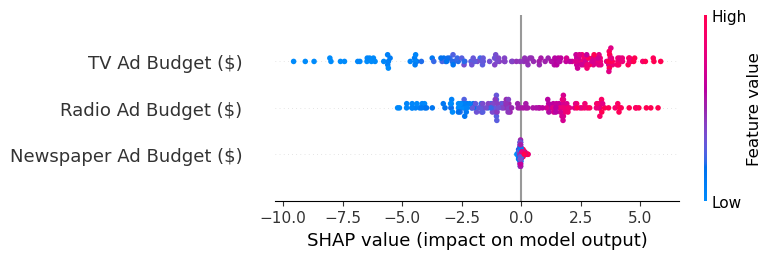

In [45]:
shap.summary_plot(shap_train,X_train)

<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

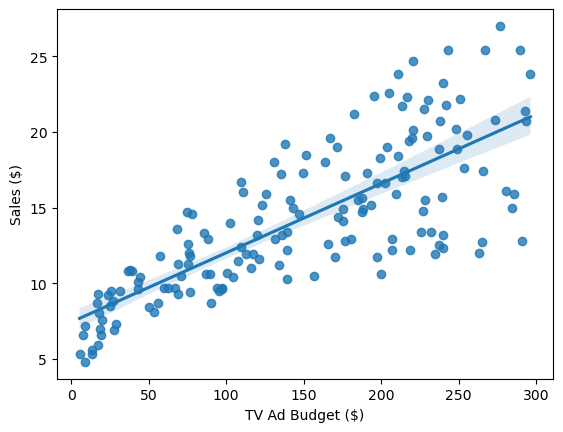

In [46]:
sns.regplot(
    x=X_train['TV Ad Budget ($)'],
    y=y_train
)

<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

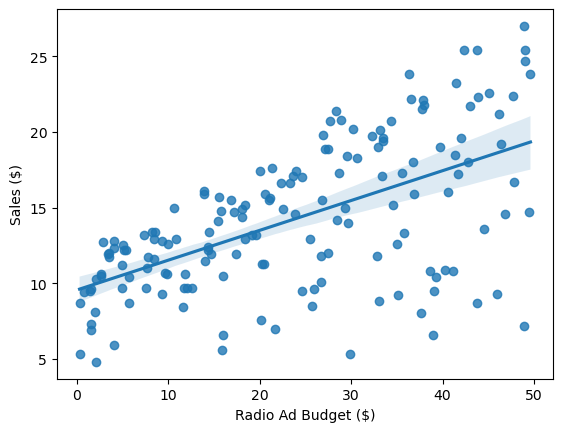

In [47]:
sns.regplot(
    x=X_train['Radio Ad Budget ($)'],
    y=y_train
)

<Axes: xlabel='Newspaper Ad Budget ($)', ylabel='Sales ($)'>

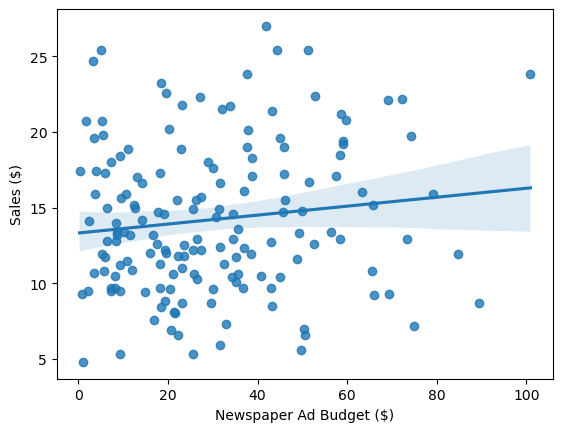

In [48]:
sns.regplot(
    x=X_train['Newspaper Ad Budget ($)'],
    y=y_train
)

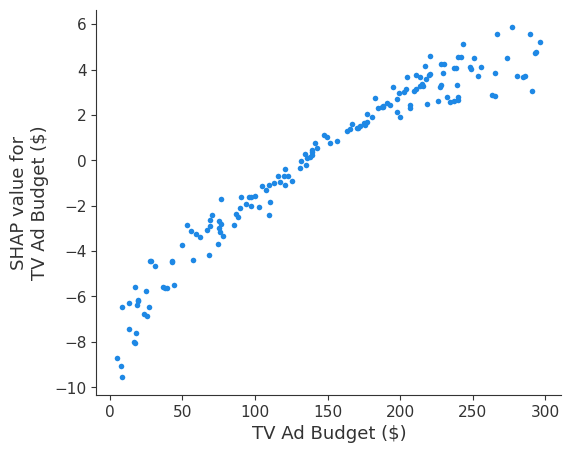

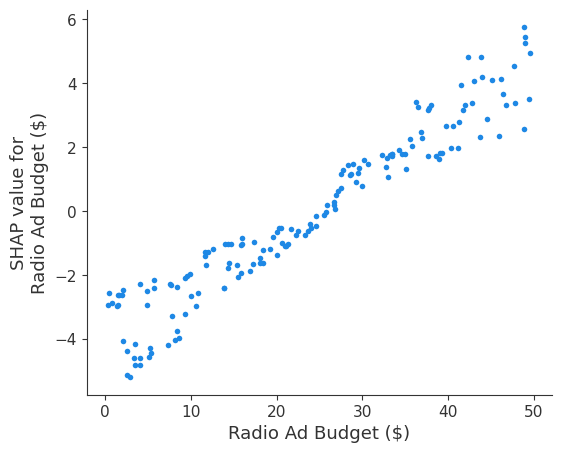

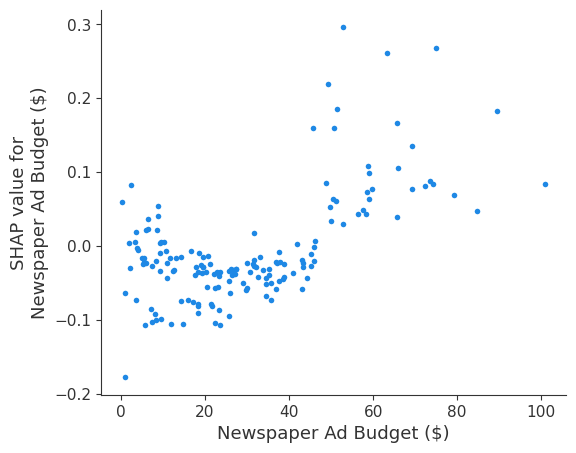

In [49]:
shap.dependence_plot(
    'TV Ad Budget ($)',
    shap_train,
    X_train,
    interaction_index=None
)

shap.dependence_plot(
    'Radio Ad Budget ($)',
    shap_train,
    X_train,
    interaction_index=None,
)

shap.dependence_plot(
    'Newspaper Ad Budget ($)',
    shap_train,
    X_train,
    interaction_index=None
)

In [50]:
interaction = explaner.shap_interaction_values(X_train)

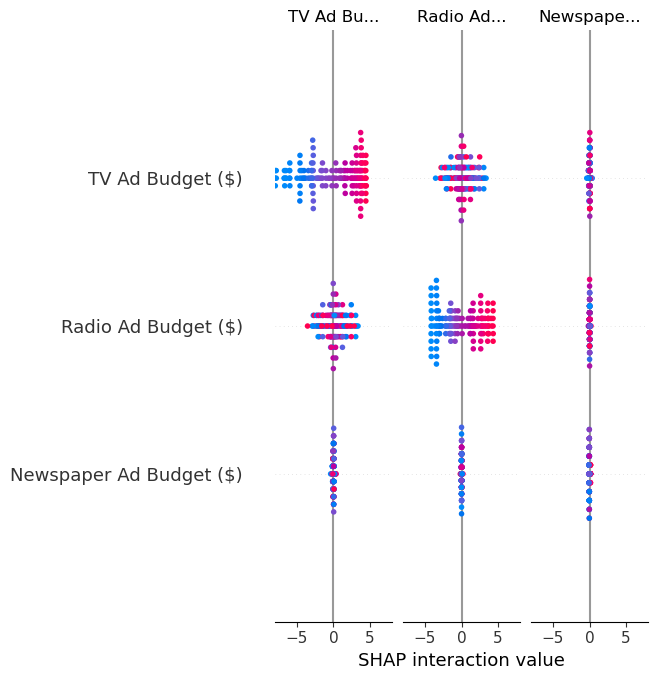

In [51]:
shap.summary_plot(interaction,X_train)

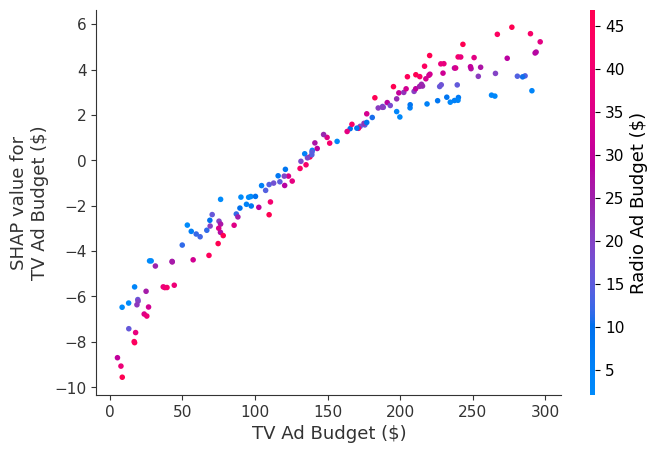

In [52]:
shap.dependence_plot(
    'TV Ad Budget ($)',
    shap_train,
    X_train,
    interaction_index='auto',
)


In [63]:
shap.force_plot(
    explainer.expected_value,shap_train[1],features=X_train.iloc[1],feature_names=X_train.columns
)

In [74]:
shap.force_plot(
    explainer.expected_value,shap_train[-5],features=X_train.iloc[-5],feature_names=X_train.columns
)

In [72]:
X_train.sample(10)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
83,75.3,20.3,32.5
73,26.8,33.0,19.3
180,165.6,10.0,17.6
61,53.5,2.0,21.4
168,206.8,5.2,19.4
166,234.5,3.4,84.8
1,230.1,37.8,69.2
93,217.7,33.5,59.0
138,273.7,28.9,59.7
197,94.2,4.9,8.1


#### LIME, Feature Importance, Permutation Importance

---

<br><br><br>

## xgboost

---

In [21]:
import xgboost

In [22]:
X,y = shap.datasets.california()

In [23]:
xgb = xgboost.XGBRegressor()

In [24]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
explainer = shap.Explainer(xgb)

In [26]:
shap_values = explainer(X)

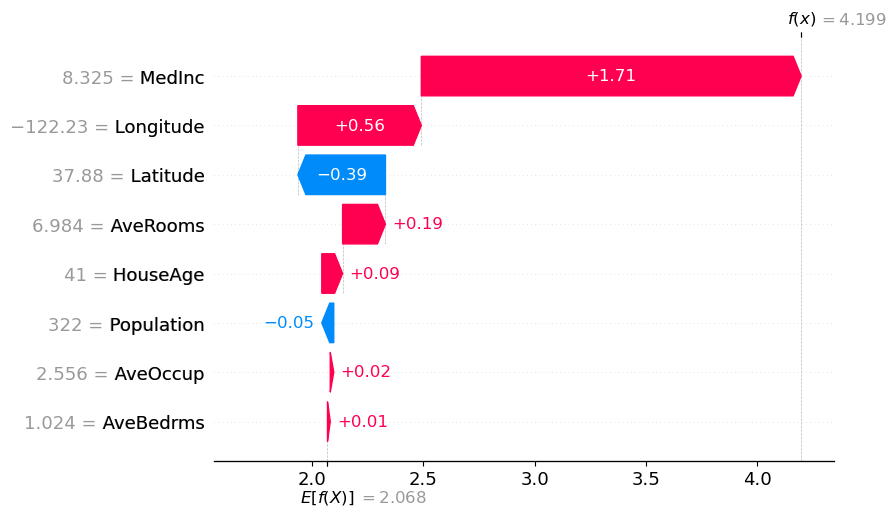

In [27]:
shap.waterfall_plot(
    shap_values[0]
)

In [28]:
shap.force_plot(
    shap_values[:500],
)